In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris 

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import VotingClassifier

In [29]:
X,y = load_iris(return_X_y=True)

In [38]:
df = pd.DataFrame(X,columns=['sepalLen','sepalWid','petalLen','petalWid'])

In [40]:
df['species'] = y

In [41]:
df

,sepalLen,sepalWid,petalLen,petalWid,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [42]:
X.shape

(150, 4)

In [44]:
#X

In [46]:
#y

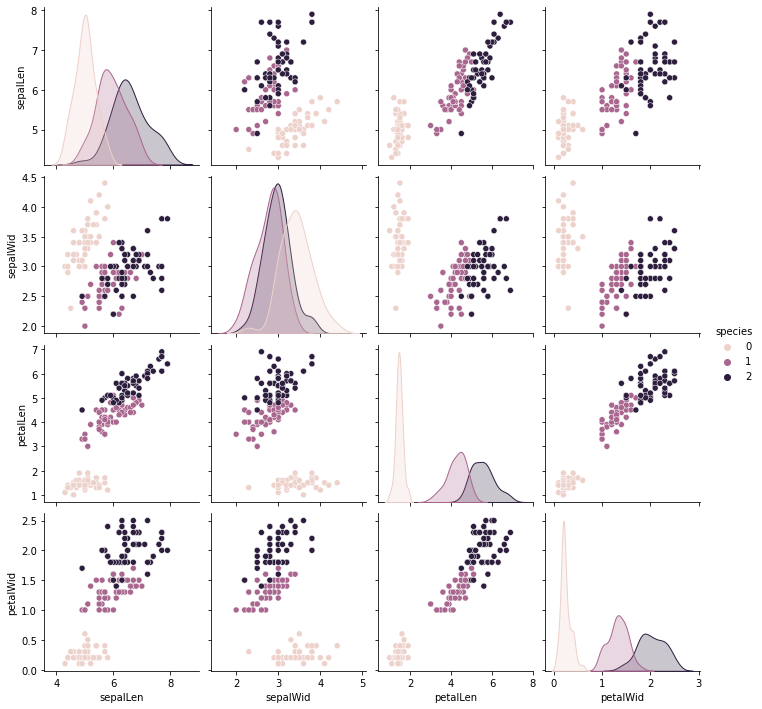

In [47]:
sns.pairplot(df,hue='species')

In iris dataset, classification gives accuracy almost 98-99%. So, to make things difficult, we will apply voting ensemble on <b>sepalLen and sepalWid</b> data of class 1 and 2(scatter plot).

In [48]:
df

,sepalLen,sepalWid,petalLen,petalWid,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [50]:
new_df = df[df['species'] != 0][['sepalLen','sepalWid','species']]

In [51]:
new_df

,sepalLen,sepalWid,species
50,7.0,3.2,1
51,6.4,3.2,1
52,6.9,3.1,1
53,5.5,2.3,1
54,6.5,2.8,1
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [52]:
X = new_df.iloc[:,0:2]
y = new_df.iloc[:,-1]

In [55]:
#y
#X

### Different Base Models

In [65]:
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()

In [66]:
estimators = [('lr',clf1),('rf',clf2),('knn',clf3)] #Base models

In [67]:
for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv = 10,scoring='accuracy')
    #print(x)    #x is a list 
    print(estimator[0],np.round(np.mean(x),2))

lr 0.75
rf 0.6
knn 0.62


### Hard Voting

In [72]:
#Not necessary that the voting classifier will be the best classifier
hv_clf = VotingClassifier(estimators=estimators,voting='hard')
x = cross_val_score(hv_clf,X,y,cv = 10, scoring='accuracy')
print(np.round(np.mean(x),2))

0.67


### Soft Voting

In [73]:
sv_clf = VotingClassifier(estimators = estimators,voting = 'soft')
x = cross_val_score(sv_clf,X,y,cv = 10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.64


As both soft and hard voting are performing poorer than the logistic regression, in this case, you can use logistic regression instead. But in real life we try all the models possible and then decide which one to choose.

### Weighted Voting

You can assign different weights to individual classifiers.

In [78]:
n = 0
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            n = n + 1
            sv_clf = VotingClassifier(estimators = estimators,voting = 'soft',weights=[i,j,k])
            x = cross_val_score(sv_clf,X,y,cv = 10,scoring='accuracy')
            print("No {}   i = {}, j = {}, k = {}".format(n,i,j,k),np.round(np.mean(x),2))

No 1   i = 1, j = 1, k = 1 0.64
No 2   i = 1, j = 1, k = 2 0.65
No 3   i = 1, j = 1, k = 3 0.66
No 4   i = 1, j = 2, k = 1 0.63
No 5   i = 1, j = 2, k = 2 0.64
No 6   i = 1, j = 2, k = 3 0.64
No 7   i = 1, j = 3, k = 1 0.64
No 8   i = 1, j = 3, k = 2 0.62
No 9   i = 1, j = 3, k = 3 0.64
No 10   i = 2, j = 1, k = 1 0.68
No 11   i = 2, j = 1, k = 2 0.66
No 12   i = 2, j = 1, k = 3 0.67
No 13   i = 2, j = 2, k = 1 0.65
No 14   i = 2, j = 2, k = 2 0.64
No 15   i = 2, j = 2, k = 3 0.65
No 16   i = 2, j = 3, k = 1 0.62
No 17   i = 2, j = 3, k = 2 0.64
No 18   i = 2, j = 3, k = 3 0.65
No 19   i = 3, j = 1, k = 1 0.7
No 20   i = 3, j = 1, k = 2 0.69
No 21   i = 3, j = 1, k = 3 0.68
No 22   i = 3, j = 2, k = 1 0.68
No 23   i = 3, j = 2, k = 2 0.68
No 24   i = 3, j = 2, k = 3 0.65
No 25   i = 3, j = 3, k = 1 0.68
No 26   i = 3, j = 3, k = 2 0.66
No 27   i = 3, j = 3, k = 3 0.65


### Same Base Models

In [81]:
from sklearn.datasets import make_classification

X,y = make_classification(n_samples=1000,n_features=20,n_informative=15,n_redundant=5,random_state=2)

svm1 = SVC(probability=True,kernel='poly',degree=1)
svm2 = SVC(probability=True,kernel='poly',degree=2)
svm3 = SVC(probability=True,kernel='poly',degree=3)  
svm4 = SVC(probability=True,kernel='poly',degree=4)
svm5 = SVC(probability=True,kernel='poly',degree=5)

estimators = [('svm1',svm1),('svm2',svm2),('svm3',svm3),('svm4',svm4),('svm5',svm5)]

#estimator[0] #For printing out later
for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0], np.round(np.mean(x),2))

svm1 0.85
svm2 0.85
svm3 0.89
svm4 0.81
svm5 0.86


degree 3 performs better than the other degrees

### Hard Voting

In [82]:
hv_clf = VotingClassifier(estimators = estimators)
x = cross_val_score(hv_clf,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.91


### Soft Voting

In [83]:
hv_clf = VotingClassifier(estimators = estimators,voting='soft')
x = cross_val_score(hv_clf,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.93
